In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
import os
os.getcwd()


'C:\\Users\\KIIT\\OneDrive\\Desktop\\Amazon_Order_Fulfilment_Operations\\Python_Work'

In [3]:
df = pd.read_csv("../Working_Files/amazon_orders_clean.csv")


In [4]:
df.head()


,index,order_id,date,status,fulfilment,sales_channel,ship-service-level,category,size,courier_status,qty,currency,amount,ship-city,ship-state,ship-postal-code,ship-country,b2b,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [5]:
df.shape


(79831, 19)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79831 entries, 0 to 79830
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               79831 non-null  int64  
 1   order_id            79831 non-null  object 
 2   date                79831 non-null  object 
 3   status              79831 non-null  object 
 4   fulfilment          79831 non-null  object 
 5   sales_channel       79831 non-null  object 
 6   ship-service-level  79831 non-null  object 
 7   category            79831 non-null  object 
 8   size                79831 non-null  object 
 9   courier_status      79831 non-null  object 
 10  qty                 79831 non-null  int64  
 11  currency            75079 non-null  object 
 12  amount              75079 non-null  float64
 13  ship-city           79811 non-null  object 
 14  ship-state          79811 non-null  object 
 15  ship-postal-code    79811 non-null  float64
 16  ship

In [7]:
df.columns


Index(['index', 'order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship-service-level', 'category', 'size', 'courier_status', 'qty',
       'currency', 'amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'b2b', 'fulfilled-by'],
      dtype='object')

In [10]:
df['status'].value_counts()


status
Shipped                          46528
Shipped - Delivered to Buyer     20372
Cancelled                        11378
Shipped - Returned to Seller      1509
Shipped - Returning to Seller       15
Shipped - Picked Up                  8
Pending                              8
Shipped - Rejected by Buyer          6
Shipped - Lost in Transit            5
Shipped - Out for Delivery           2
Name: count, dtype: int64

In [11]:
df['fulfilment'].value_counts()


fulfilment
Amazon      53258
Merchant    26573
Name: count, dtype: int64

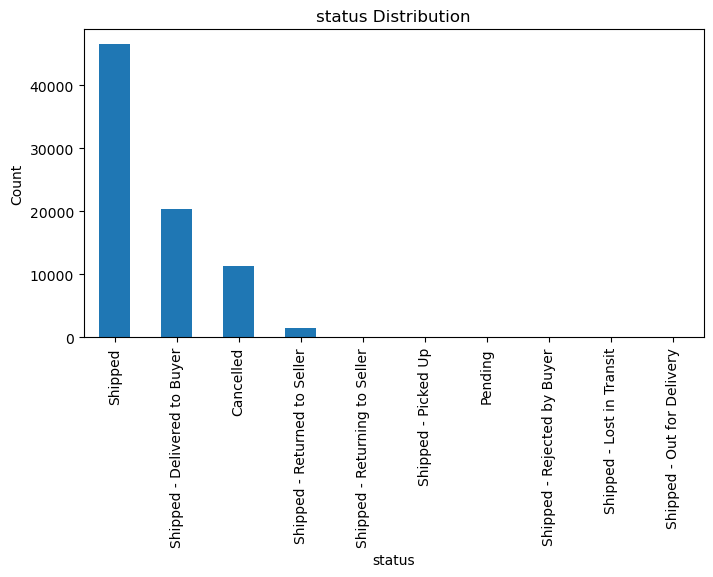

In [12]:
plt.figure(figsize=(8,4))
df['status'].value_counts().plot(kind='bar')
plt.title("status Distribution")
plt.xlabel("status")
plt.ylabel("Count")
plt.show()


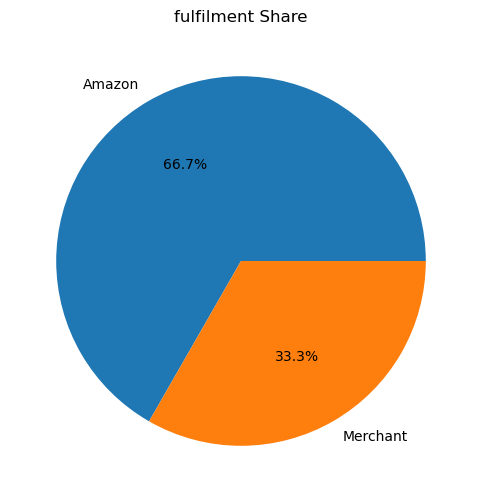

In [13]:
df['fulfilment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6)
)
plt.title("fulfilment Share")
plt.ylabel("")
plt.show()


In [14]:
df['date'] = pd.to_datetime(df['date'])


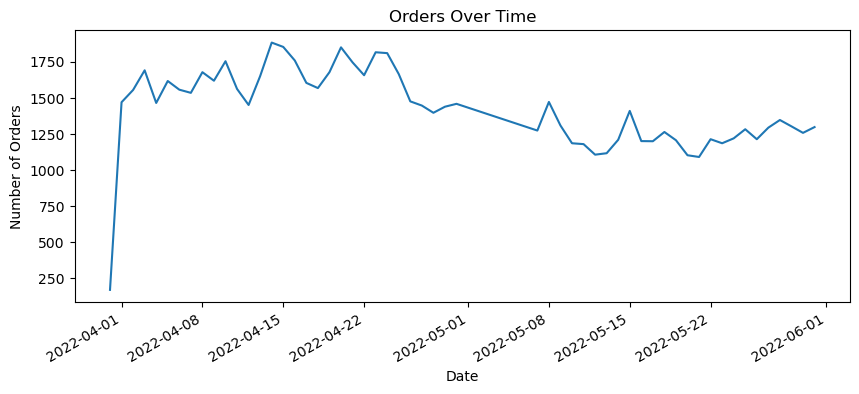

In [16]:
orders_by_date = df.groupby('date').size()

plt.figure(figsize=(10,4))
orders_by_date.plot()
plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()


In [18]:
df['category'].value_counts().head(10)


category
T-shirt     31571
Shirt       30196
Blazzer      9153
Trousers     7108
Perfume       716
Wallet        672
Socks         304
Shoes         111
Name: count, dtype: int64

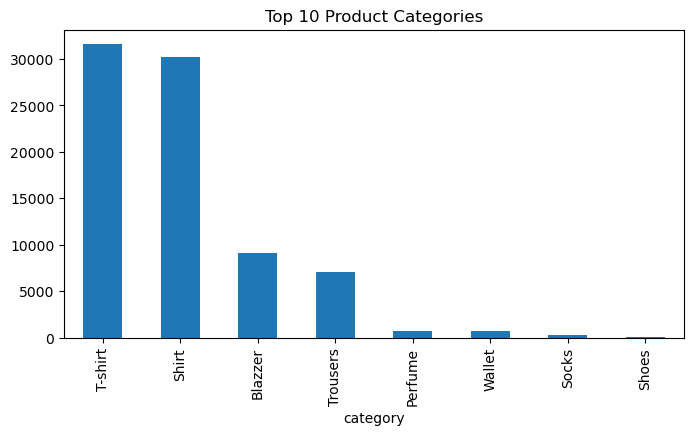

In [19]:
plt.figure(figsize=(8,4))
df['category'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Product Categories")
plt.show()


In [21]:
df['amount'].describe()


count    75079.000000
mean       643.975826
std        278.725732
min          0.000000
25%        449.000000
50%        599.000000
75%        788.000000
max       5584.000000
Name: amount, dtype: float64

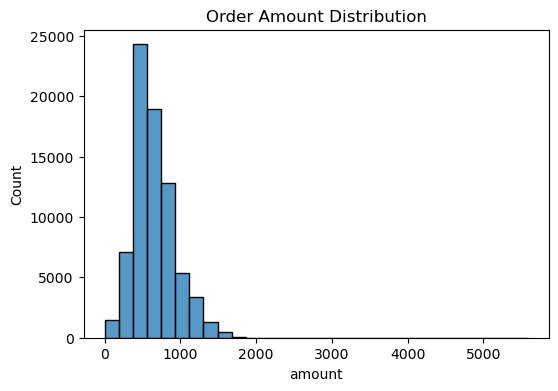

In [22]:
plt.figure(figsize=(6,4))
sns.histplot(df['amount'], bins=30)
plt.title("Order Amount Distribution")
plt.show()


In [24]:
# ### Key Insights
# - Most orders are delivered successfully
# - Amazon fulfilment dominates
# - Certain categories generate higher volume
# - Order trend varies over time
